In [1]:
import os, json
import pandas as pd
from pandas.io.json import json_normalize
import glob
path_to_json = 'C:/Users/srika/Downloads/altmetric_clean_sample/altmetric_clean_sample/'
folders=[]
for i in os.listdir(path_to_json):
    folders.append('C:/Users/srika/Downloads/altmetric_clean_sample/altmetric_clean_sample/' + i)
jf=[]
for i in folders:
    allFiles = glob.glob(i + "/*.json")
    for j in allFiles:
        jf.append(j)
data=[]
for index, js in enumerate(jf):
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)
        data.append(json_text)

In [2]:
len(data)

100000

In [3]:
data[0].keys()

dict_keys(['altmetric_id', 'counts', 'selected_quotes', 'citation', 'altmetric_score', 'demographics', 'posts'])

In [4]:
import numpy as np
np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.3f}'.format})
pd.options.display.float_format = '{:,.3f}'.format

In [5]:
df=pd.DataFrame()
df['Altmertic Id']=pd.Series([data[i]['altmetric_id'] for i in range(len(data))])
df.head()

,Altmertic Id
0,100080
1,100163
2,100180
3,100181
4,100206


In [6]:
import numpy as np
cols=['twitter', 'facebook', 'googleplus', 'reddit', 'blogs', 'peer_reviews', 'news', 'f1000', 'wikipedia']
for j in cols:
    l=[]
    for i in range(len(data)):
        try:
            l.append(data[i]['counts'][j]['posts_count'])
        except KeyError:
            l.append(0)
    df[j]=pd.Series(l, index=df.index)
df.head()

,Altmertic Id,twitter,facebook,googleplus,reddit,blogs,peer_reviews,news,f1000,wikipedia
0,100080,5,2,0,0,17,0,9,0,0
1,100163,4,1,0,1,2,0,2,0,0
2,100180,0,0,0,0,1,0,0,0,0
3,100181,0,1,0,0,1,0,0,0,0
4,100206,0,0,0,0,1,0,0,0,0


In [7]:
for i in range(len(data)):
    try:
        print(i, data[i]['posts'].keys())
    except KeyError:
        continue
    

0 dict_keys(['blogs', 'news', 'video', 'twitter', 'facebook', 'policy'])
1 dict_keys(['twitter', 'blogs', 'reddit', 'news', 'facebook', 'policy'])
2 dict_keys(['blogs'])
3 dict_keys(['blogs', 'facebook'])
4 dict_keys(['blogs'])
5 dict_keys(['blogs', 'twitter', 'news'])
6 dict_keys(['twitter'])
7 dict_keys(['blogs'])
8 dict_keys(['blogs', 'twitter', 'facebook', 'wikipedia', 'news', 'googleplus', 'video'])
9 dict_keys(['blogs'])
10 dict_keys(['blogs', 'twitter', 'wikipedia', 'googleplus', 'facebook', 'news', 'peer_reviews', 'policy'])
11 dict_keys(['twitter'])
12 dict_keys(['blogs'])
13 dict_keys(['blogs', 'twitter', 'wikipedia'])
14 dict_keys(['blogs'])
15 dict_keys(['twitter'])
16 dict_keys(['blogs'])
17 dict_keys(['blogs', 'twitter', 'news', 'facebook', 'policy'])
18 dict_keys(['blogs'])
19 dict_keys(['blogs', 'wikipedia', 'twitter'])
20 dict_keys(['reddit', 'blogs'])
21 dict_keys(['blogs'])
22 dict_keys(['blogs'])
23 dict_keys(['twitter'])
24 dict_keys(['blogs', 'twitter', 'f1000', '

971 dict_keys(['twitter'])
972 dict_keys(['twitter', 'facebook'])
973 dict_keys(['twitter'])
974 dict_keys(['policy'])
975 dict_keys(['blogs', 'twitter'])
976 dict_keys(['twitter'])
977 dict_keys(['twitter'])
978 dict_keys(['twitter', 'facebook'])
979 dict_keys(['news'])
980 dict_keys(['policy'])
981 dict_keys(['news'])
982 dict_keys(['news'])
983 dict_keys(['twitter'])
984 dict_keys(['news'])
985 dict_keys(['news'])
986 dict_keys(['blogs', 'news'])
987 dict_keys(['twitter'])
988 dict_keys(['facebook'])
989 dict_keys(['twitter'])
990 dict_keys(['twitter', 'googleplus', 'facebook'])
991 dict_keys(['twitter', 'facebook', 'googleplus', 'blogs', 'wikipedia'])
992 dict_keys(['twitter'])
993 dict_keys(['twitter', 'facebook'])
994 dict_keys(['twitter'])
995 dict_keys(['twitter'])
996 dict_keys(['reddit'])
997 dict_keys(['twitter'])
998 dict_keys(['twitter'])
999 dict_keys(['twitter'])
1000 dict_keys(['twitter'])
1001 dict_keys(['twitter'])
1002 dict_keys(['twitter'])
1003 dict_keys(['twitter'

AttributeError: 'list' object has no attribute 'keys'

In [8]:
y=[]
count=0
for i in range(len(data)):
    try:
        x=data[i]['posts']['video'][0]['url']
        if 'youtube' in x:
            y.append(1)
        else:
            y.append(0)
    except KeyError:
        y.append(0)
    except TypeError:
        y.append(0)
df['Youtube']=pd.Series(y, index=df.index)

In [9]:
data[164]['posts']['facebook'][0].keys()

dict_keys(['title', 'url', 'citation_ids', 'posted_on', 'summary', 'author'])

In [10]:
df.head()

,Altmertic Id,twitter,facebook,googleplus,reddit,blogs,peer_reviews,news,f1000,wikipedia,Youtube
0,100080,5,2,0,0,17,0,9,0,0,1
1,100163,4,1,0,1,2,0,2,0,0,0
2,100180,0,0,0,0,1,0,0,0,0,0
3,100181,0,1,0,0,1,0,0,0,0,0
4,100206,0,0,0,0,1,0,0,0,0,0


In [11]:
l=[]
for i in range(len(data)):
    try:
        l.append(data[i]['counts']['readers']['mendeley'])
    except KeyError:
        l.append(0)
df['Mendeley']=pd.Series(l, index=df.index)
df.head()

,Altmertic Id,twitter,facebook,googleplus,reddit,blogs,peer_reviews,news,f1000,wikipedia,Youtube,Mendeley
0,100080,5,2,0,0,17,0,9,0,0,1,133
1,100163,4,1,0,1,2,0,2,0,0,0,193
2,100180,0,0,0,0,1,0,0,0,0,0,104
3,100181,0,1,0,0,1,0,0,0,0,0,11
4,100206,0,0,0,0,1,0,0,0,0,0,0


In [12]:
l=[]
for i in range(len(data)):
    try:
        l.append(data[i]['altmetric_score']['score'])
    except KeyError:
        l.append(0)
df['Altmetrics_score']=pd.Series(l, index=df.index)
df.head()

,Altmertic Id,twitter,facebook,googleplus,reddit,blogs,peer_reviews,news,f1000,wikipedia,Youtube,Mendeley,Altmetrics_score
0,100080,5,2,0,0,17,0,9,0,0,1,133,155.080
1,100163,4,1,0,1,2,0,2,0,0,0,193,40.376
2,100180,0,0,0,0,1,0,0,0,0,0,104,5.048
3,100181,0,1,0,0,1,0,0,0,0,0,11,5.626
4,100206,0,0,0,0,1,0,0,0,0,0,0,5.048


In [14]:
from sklearn import preprocessing
names = df.columns
scaler = preprocessing.StandardScaler(with_mean=False)
scaled_df = scaler.fit_transform(df.drop(['Altmertic Id', 'Youtube'], axis=1).values)
scaled_df = pd.DataFrame(scaled_df, columns=['twitter', 'facebook', 'googleplus', 'reddit', 'blogs', 'peer_reviews', 'news', 'f1000', 'wikipedia', 'Mendeley', 'Altmetrics_score'])

In [15]:
scaled_df.head()

,twitter,facebook,googleplus,reddit,blogs,peer_reviews,news,f1000,wikipedia,Mendeley,Altmetrics_score
0,0.135,0.357,0.000,0.000,18.174,0.000,2.242,0.000,0.000,1.825,3.504
1,0.108,0.178,0.000,5.189,2.138,0.000,0.498,0.000,0.000,2.649,0.912
2,0.000,0.000,0.000,0.000,1.069,0.000,0.000,0.000,0.000,1.427,0.114
3,0.000,0.178,0.000,0.000,1.069,0.000,0.000,0.000,0.000,0.151,0.127
4,0.000,0.000,0.000,0.000,1.069,0.000,0.000,0.000,0.000,0.000,0.114


In [26]:
scaled_df['Youtube']=pd.Series(df.loc[:, 'Youtube'], index=df.index)

In [27]:
scaled_df.head()

,twitter,facebook,googleplus,reddit,blogs,peer_reviews,news,f1000,wikipedia,Mendeley,Altmetrics_score,Youtube
0,0.135,0.357,0.000,0.000,18.174,0.000,2.242,0.000,0.000,1.825,3.504,1
1,0.108,0.178,0.000,5.189,2.138,0.000,0.498,0.000,0.000,2.649,0.912,0
2,0.000,0.000,0.000,0.000,1.069,0.000,0.000,0.000,0.000,1.427,0.114,0
3,0.000,0.178,0.000,0.000,1.069,0.000,0.000,0.000,0.000,0.151,0.127,0
4,0.000,0.000,0.000,0.000,1.069,0.000,0.000,0.000,0.000,0.000,0.114,0


In [28]:
cols=scaled_df.drop('Youtube', axis=1).columns
cols

Index(['twitter', 'facebook', 'googleplus', 'reddit', 'blogs', 'peer_reviews',
       'news', 'f1000', 'wikipedia', 'Mendeley', 'Altmetrics_score'],
      dtype='object')

In [29]:
corr=scaled_df.loc[:, cols].corr(method='pearson')
corr

,twitter,facebook,googleplus,reddit,blogs,peer_reviews,news,f1000,wikipedia,Mendeley,Altmetrics_score
twitter,1.000,0.418,0.265,0.384,0.410,0.138,0.443,0.015,0.023,0.069,0.776
facebook,0.418,1.000,0.284,0.239,0.285,0.054,0.231,0.010,0.040,0.029,0.419
googleplus,0.265,0.284,1.000,0.257,0.276,0.052,0.156,0.008,0.037,0.076,0.296
reddit,0.384,0.239,0.257,1.000,0.257,0.102,0.203,0.014,0.038,0.051,0.376
blogs,0.410,0.285,0.276,0.257,1.000,0.156,0.495,0.065,0.092,0.192,0.616
peer_reviews,0.138,0.054,0.052,0.102,0.156,1.000,0.114,0.026,0.006,0.062,0.158
news,0.443,0.231,0.156,0.203,0.495,0.114,1.000,0.034,0.039,0.079,0.864
f1000,0.015,0.010,0.008,0.014,0.065,0.026,0.034,1.000,0.016,0.151,0.040
wikipedia,0.023,0.040,0.037,0.038,0.092,0.006,0.039,0.016,1.000,0.119,0.063
Mendeley,0.069,0.029,0.076,0.051,0.192,0.062,0.079,0.151,0.119,1.000,0.113


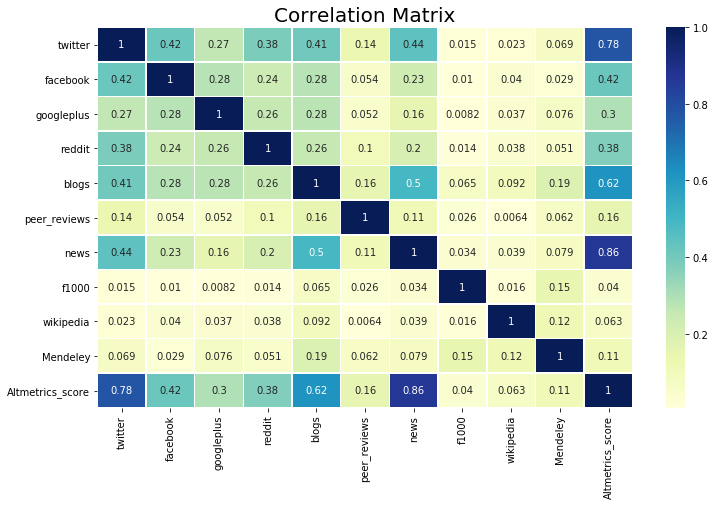

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,7))
ax = plt.axes()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="YlGnBu", annot=True, linewidths=.5, ax = ax)
ax.set_title('Correlation Matrix', fontsize=20)
plt.show()

In [31]:
count=0
for i in range(len(data)):
    try:
        if 'video' in data[i]['posts'].keys():
            print(data[i]['altmetric_id'], data[i]['posts']['video'][0]['url'])
            count+=1
    except AttributeError:
        continue
count 

100080 https://www.youtube.com/watch?v=t2Q2T6jQlY0
100638 https://www.youtube.com/watch?v=hKwh1IbplKE
103123 https://www.youtube.com/watch?v=6dFxu6hrEKk
104169 https://www.youtube.com/watch?v=AeWnL0Fa_kg
1011451 https://www.youtube.com/watch?v=klRfruVtuvA
1019162 https://www.youtube.com/watch?v=-Kxv9fd6E3w
1033051 https://www.youtube.com/watch?v=h5gro9Gg9oQ
1036322 https://www.youtube.com/watch?v=dr-QaeY7AUA
10313512 https://www.youtube.com/watch?v=z6f9vo4Pr44
1058783 https://www.youtube.com/watch?v=6cZN1PmNKH4
1058916 https://www.youtube.com/watch?v=nEpfS780kQ8
10519446 https://www.youtube.com/watch?v=x1ZWrus6qHQ
10519449 https://www.youtube.com/watch?v=x1ZWrus6qHQ
10519456 https://www.youtube.com/watch?v=iToXSqKh9Jc
1065753 https://www.youtube.com/watch?v=UqQKBcGNsxE
1069081 https://www.youtube.com/watch?v=wb9SF4VZDQA
1075421 https://www.youtube.com/watch?v=zr5o0bp2Lg8
1077177 https://www.youtube.com/watch?v=1tlf_ejwqi8
10734040 https://www.youtube.com/watch?v=MQYOsy_AC_U
10794258 ht

616

0    99384
1      616
Name: Youtube, dtype: int64

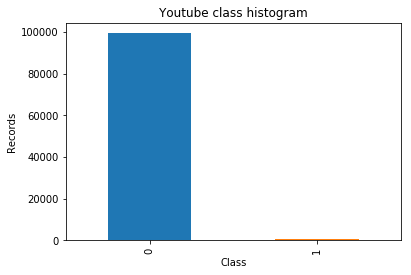

In [32]:
pd.value_counts(scaled_df['Youtube']).plot.bar()
plt.title('Youtube class histogram')
plt.xlabel('Class')
plt.ylabel('Records')
df['Youtube'].value_counts()

# The data is highly imbalanced,  just 616 papers were posted in youtube out of 100,000 samples

# Using KNN as classifier - look at recall value 

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [35]:
X=np.array(scaled_df.drop(['Youtube'], axis=1).values)
y=np.array(scaled_df['Youtube'].values)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_train_pre = knn.predict(X_train)
cnf_mat_tra = confusion_matrix(y_train, y_train_pre)

In [37]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[69556    13]
 [  355    76]]


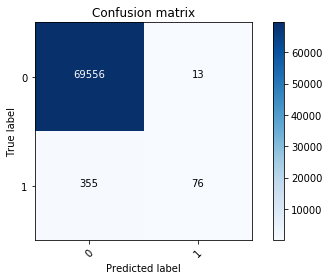

In [39]:
# confusion matrix for the training data
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_mat_tra , classes=class_names, title='Confusion matrix')
plt.show()

In [40]:
y_pred = knn.predict(X_test)
conf_mat=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[29809     6]
 [  161    24]]
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     29815
          1       0.80      0.13      0.22       185

avg / total       0.99      0.99      0.99     30000



the recall value is 0.13 - too low, caused by the imbalance data

Confusion matrix, without normalization
[[29809     6]
 [  161    24]]


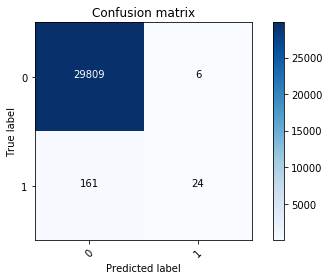

In [41]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(conf_mat , classes=class_names, title='Confusion matrix')
plt.show()

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [53]:
parameters = {'C': np.linspace(1, 10, 10)}
logreg=LogisticRegression()
lt = GridSearchCV(logreg, parameters, cv=5, verbose=5, n_jobs=3)
lt.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    2.1s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    6.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [54]:
lt.best_params_['C']

1.0

[LibLinear]Confusion matrix, without normalization
[[69551    18]
 [  422     9]]


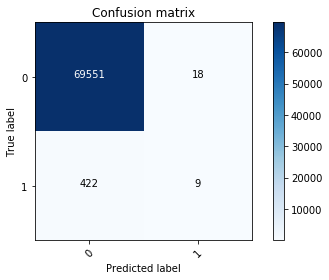

In [58]:
lt = LogisticRegression(C=1,penalty='l1', verbose=5)
lt.fit(X_train, y_train)
y_train_lt = lt.predict(X_train)
cnf_mat_tra_lt = confusion_matrix(y_train, y_train_lt)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_mat_tra_lt , classes=class_names, title='Confusion matrix')
plt.show()

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     29815
          1       0.40      0.02      0.04       185

avg / total       0.99      0.99      0.99     30000

Confusion matrix, without normalization
[[29809     6]
 [  181     4]]


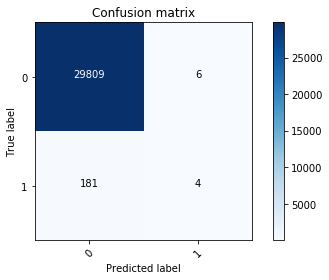

In [59]:
y_pred_lt=lt.predict(X_test)
cnf_mat_tes_lt = confusion_matrix(y_test, y_pred_lt)
print(classification_report(y_test, y_pred_lt))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_mat_tes_lt , classes=class_names, title='Confusion matrix')
plt.show()


# Using  SMOTE for this imbalanced data

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
from imblearn.over_sampling import SMOTE


In [62]:
sm = SMOTE(random_state=2)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (70000, 11)
Number transactions y_train dataset:  (70000,)
Number transactions X_test dataset:  (30000, 11)
Number transactions y_test dataset:  (30000,)


In [63]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 431
Before OverSampling, counts of label '0': 69569 



In [64]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (139138, 11)
After OverSampling, the shape of train_y: (139138,) 



In [65]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 69569
After OverSampling, counts of label '0': 69569


In [66]:
parameters = {'C': np.linspace(1, 10, 10)}
logreg=LogisticRegression()
clf = GridSearchCV(logreg, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    3.5s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:   11.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [67]:
clf.best_params_['C']

2.0

In [68]:
lr = LogisticRegression(C=clf.best_params_['C'],penalty='l1', verbose=5)
lr.fit(X_train_res, y_train_res.ravel())

[LibLinear]

LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=5, warm_start=False)

In [69]:
y_train_pre = lr.predict(X_train)
cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

In [70]:
print(confusion_matrix(y_train, y_train_pre))
print(classification_report(y_train, y_train_pre))

[[61664  7905]
 [  219   212]]
             precision    recall  f1-score   support

          0       1.00      0.89      0.94     69569
          1       0.03      0.49      0.05       431

avg / total       0.99      0.88      0.93     70000



Confusion matrix, without normalization
[[61664  7905]
 [  219   212]]


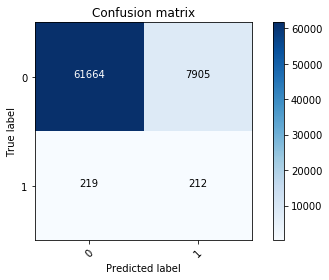

In [73]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

             precision    recall  f1-score   support

          0       1.00      0.89      0.94     29815
          1       0.03      0.49      0.05       185

avg / total       0.99      0.88      0.93     30000

Confusion matrix, without normalization
[[26411  3404]
 [   95    90]]


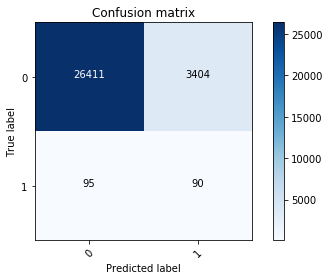

In [74]:
y_pred_ = lr.predict(X_test)
cnf_matrix_tes = confusion_matrix(y_test, y_pred_)
print(classification_report(y_test, y_pred_))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tes , classes=class_names, title='Confusion matrix')
plt.show()

In [75]:
print("Recall metric in the testing dataset: {}".format(cnf_matrix_tes[1,1]/(cnf_matrix_tes[1,0]+cnf_matrix_tes[1,1])))


Recall metric in the testing dataset: 0.4864864864864865


# Recall value - 0.49 (using KNN the recall value is 0.03)

[LibLinear]

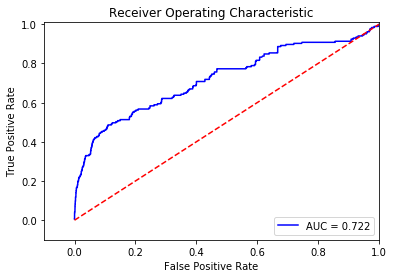

In [76]:
tmp = lr.fit(X_train_res, y_train_res.ravel())
y_pred_sample_score = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [258]:
roc_auc

0.7218205963803817

In [259]:
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

In [260]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred_)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.02


In [197]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_)

Text(0.5,1,'2-class Precision-Recall curve: AP=0.01')

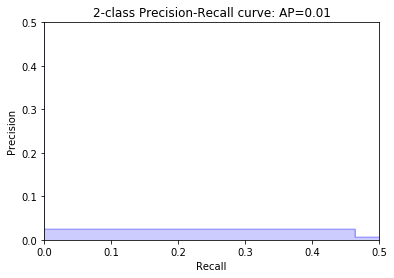

In [198]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 0.5])
plt.xlim([0.0, 0.5])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# Using SMOTE along with RandomForest

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
model_RF= RandomForestClassifier(random_state=42)

C:\Users\srika\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [78]:
smote_pipeline=make_pipeline_imb(SMOTE(random_state=4), model_RF)
smote_pipeline.fit(X_train_res, y_train_res.ravel())

Pipeline(memory=None,
     steps=[('smote', SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=4, ratio='auto', svm_estimator=None)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_...stimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     69569
          1       0.96      0.92      0.94       431

avg / total       1.00      1.00      1.00     70000

Confusion matrix, without normalization
[[69554    15]
 [   35   396]]


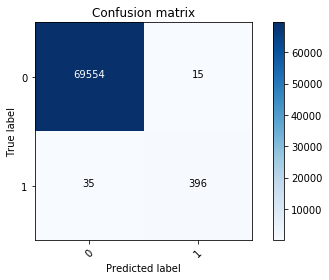

In [79]:
y_train_pre_rfc = smote_pipeline.predict(X_train)
cnf_matrix_tra_rfc = confusion_matrix(y_train, y_train_pre_rfc)
print(classification_report(y_train, y_train_pre_rfc))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra_rfc , classes=class_names, title='Confusion matrix')
plt.show()

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     29815
          1       0.33      0.30      0.32       185

avg / total       0.99      0.99      0.99     30000

Confusion matrix, without normalization
[[29703   112]
 [  129    56]]


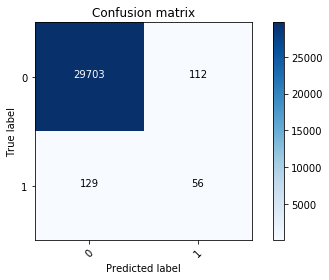

In [80]:
y_test_pre_rfc = smote_pipeline.predict(X_test)
cnf_matrix_tes_rfc = confusion_matrix(y_test, y_test_pre_rfc)
print(classification_report(y_test, y_test_pre_rfc))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tes_rfc , classes=class_names, title='Confusion matrix')
plt.show()

# Bagging with Decision Tree

In [81]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9951333333333333

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     69569
          1       0.97      0.81      0.88       431

avg / total       1.00      1.00      1.00     70000

Confusion matrix, without normalization
[[69560     9]
 [   82   349]]


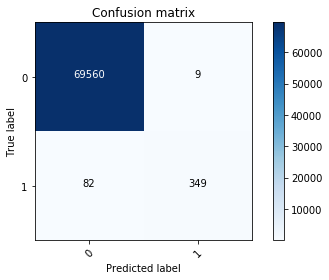

In [83]:
y_train_pre_d=model.predict(X_train)
cnf_matrix_tra_d = confusion_matrix(y_train, y_train_pre_d)
print(classification_report(y_train, y_train_pre_d))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra_d , classes=class_names, title='Confusion matrix')
plt.show()

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     29815
          1       0.82      0.27      0.41       185

avg / total       0.99      1.00      0.99     30000

Confusion matrix, without normalization
[[29804    11]
 [  135    50]]


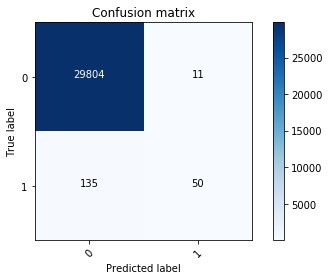

In [84]:
y_test_pre_d=model.predict(X_test)
cnf_matrix_tra_d = confusion_matrix(y_test, y_test_pre_d)
print(classification_report(y_test, y_test_pre_d))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra_d , classes=class_names, title='Confusion matrix')
plt.show()

The recall value is 0.26 - better than KNN

Boosting with Decision Tree

In [85]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
model_bc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=1))
model_bc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     69569
          1       0.42      0.02      0.04       431

avg / total       0.99      0.99      0.99     70000

Confusion matrix, without normalization
[[69555    14]
 [  421    10]]


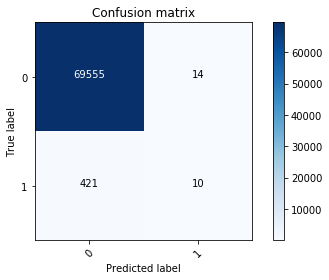

In [86]:
y_train_pre_bc=model_bc.predict(X_train)
cnf_matrix_tra_bc = confusion_matrix(y_train, y_train_pre_bc)
print(classification_report(y_train, y_train_pre_bc))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra_bc , classes=class_names, title='Confusion matrix')
plt.show()

# Using Random Forest

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     69569
          1       0.97      0.79      0.87       431

avg / total       1.00      1.00      1.00     70000

Confusion matrix, without normalization
[[69560     9]
 [   92   339]]


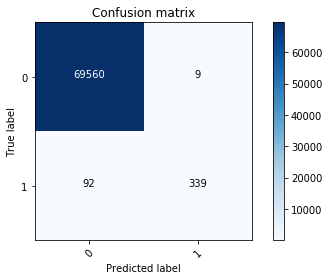

In [87]:
from sklearn.ensemble import RandomForestClassifier
model_RF= RandomForestClassifier(random_state=1)
model_RF.fit(X_train, y_train)
y_train_pre_RF=model_RF.predict(X_train)
cnf_matrix_tra_RF = confusion_matrix(y_train, y_train_pre_RF)
print(classification_report(y_train, y_train_pre_RF))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra_RF , classes=class_names, title='Confusion matrix')
plt.show()

In [88]:
df.drop(['Altmertic Id', 'Youtube'], axis=1).columns

Index(['twitter', 'facebook', 'googleplus', 'reddit', 'blogs', 'peer_reviews',
       'news', 'f1000', 'wikipedia', 'Mendeley', 'Altmetrics_score'],
      dtype='object')

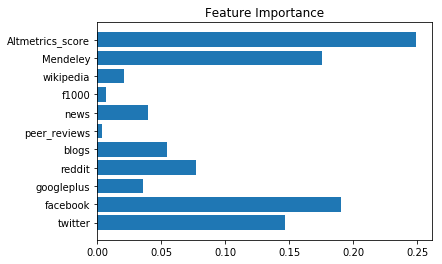

In [89]:
importances = model_RF.feature_importances_
plt.barh(df.drop(['Altmertic Id', 'Youtube'], axis=1).columns, importances) 
plt.title("Feature Importance") 
plt.show()

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     29815
          1       0.73      0.22      0.33       185

avg / total       0.99      0.99      0.99     30000

Confusion matrix, without normalization
[[29800    15]
 [  145    40]]


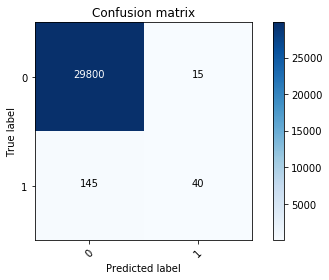

In [90]:
y_test_pre_RF=model_RF.predict(X_test)
cnf_matrix_tra_RF = confusion_matrix(y_test, y_test_pre_RF)
print(classification_report(y_test, y_test_pre_RF))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra_RF, classes=class_names, title='Confusion matrix')
plt.show()

Recall value is 0.22

# Using SVM as calssifier

In [45]:
from sklearn import svm
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)

In [ ]:
parameters = {'C': np.linspace(1, 10, 10)}
clf = svm.SVC(kernel='linear', C=1E10)
clf = GridSearchCV(clf, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_t_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [164]:
data[2].keys()

dict_keys(['altmetric_id', 'counts', 'citation', 'altmetric_score', 'demographics', 'posts'])

In [173]:
data[2]['citation']

{'abstract': 'Discovering that drug entities already approved for one disease are effective treatments for other distinct diseases can be highly beneficial and cost effective. To do this predictively, our conjecture is that a semantic infrastructure linking mechanistic relationships between pharmacologic entities and multidimensional knowledge of biological systems and disease processes will be highly enabling.',
 'abstract_source': 'pubmed',
 'altmetric_jid': '4f6fa4d03cf058f6100007a9',
 'authors': ['Xiaoyan A Qu',
  'Ranga C Gudivada',
  'Anil G Jegga',
  'Eric K Neumann',
  'Bruce J Aronow'],
 'doi': '10.1186/1471-2105-10-s5-s4',
 'issns': ['1471-2105'],
 'journal': 'BMC Bioinformatics',
 'last_mentioned_on': 1300738560,
 'links': ['http://www.ncbi.nlm.nih.gov/pubmed/19426461'],
 'pmid': '19426461',
 'pubdate': '2009-01-01T00:00:00+00:00',
 'publisher': 'BioMed Central',
 'publisher_subjects': [{'name': 'Biological Sciences', 'scheme': 'era'},
  {'name': 'Information And Computing S

In [167]:
data[2]['citation']['publisher']

'BioMed Central'

In [172]:
j=[]
for i in range(len(data)):
    try:
        if data[i]['citation']['publisher'] not in j:
            j.append(data[i]['citation']['publisher'])
    except KeyError:
        continue
len(j)

7741